In [58]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from WFC import WaveFunctionCollapse, WaveFunctionCollapseVisualizer
import rasterio
import seaborn as sns

from utils import visualize_3d_terrain, visualize_terrain

from functions import height_to_slopes, slopes_to_height

In [77]:
k=15

(200, 200)
data/N26E057.hgt


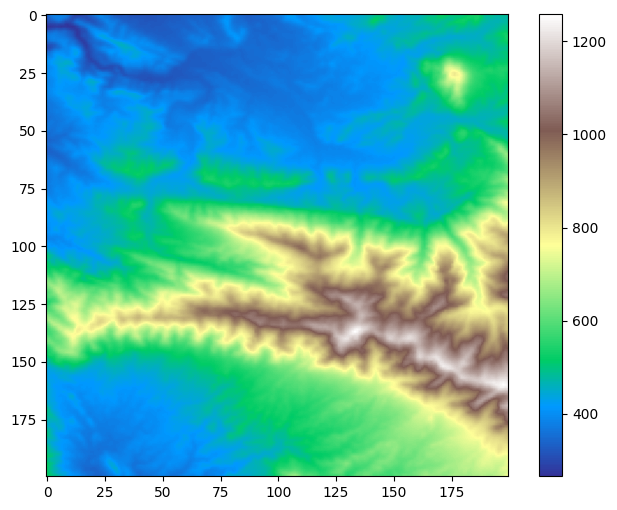

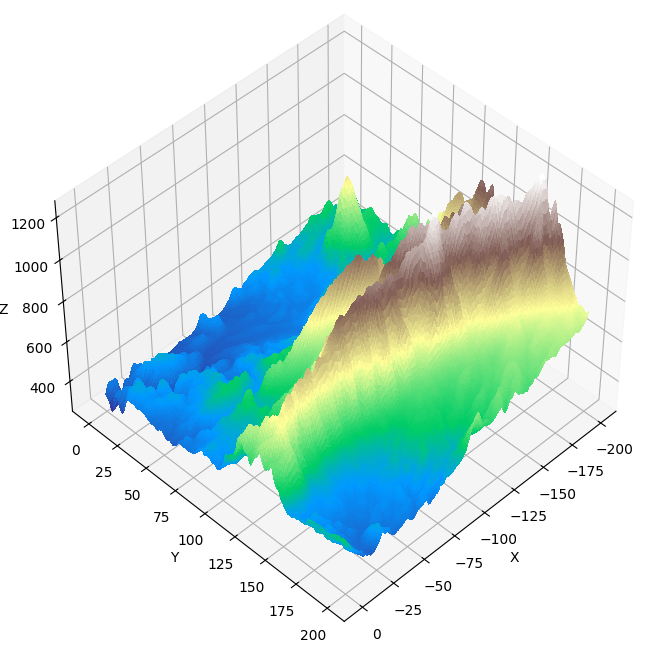

(266.0, 1258.0, 571.20615)

In [90]:
# k+=1
# dataset_dir = "/Users/parsa/Daneshgah/Arshad/Thesis/datasets/pappas_kaggle/archive"
# data_paths = sorted(glob.glob(os.path.join(dataset_dir, "*h.png")))
# sample_data_path = data_paths[k]

# # Load the image
# sample_data = iio.imread(sample_data_path, mode='I')[400:500, 400:500]  # 'I' mode ensures reading as uint16
# print(sample_data.dtype)  # This should print 'uint16'

# # Load the image
# sample_data = cv2.imread(sample_data_path, cv2.IMREAD_UNCHANGED)
# print(sample_data.dtype)  # This should print 'uint16'

# i = 15
# dataset_dir = "/Users/parsa/Daneshgah/Arshad/Thesis/datasets/SRTM_IRAN/data/"
# data_paths = sorted(glob.glob(os.path.join(dataset_dir, "*.hgt")))
# sample_data_path = data_paths[i]

# from shutil import copy2
# copy2(sample_data_path, "./data")

# with rasterio.open(sample_data_path) as src:
#     sample_data = src.read(1)[2500:3000, 1500:2000].astype(float)  # Read the first (and only) band
#     profile = src.profile  # Get metadata such as CRS, transform, etc.


sample_data_path = "data/N26E057.hgt"


scale_factor = 1.0 / 2


with rasterio.open(sample_data_path) as src:
    # Define the desired smaller shape (for example, half the original size)
    new_height = int(src.height * scale_factor)
    new_width = int(src.width * scale_factor)

    # Read and resample the data to the new shape
    sample_data = src.read(
        1,  # First band
        out_shape=(new_height, new_width),
        resampling=rasterio.enums.Resampling.bilinear  # Choose the resampling method
    ).astype(float)[800:1000, 800:1000]
    


# sample_data = np.array([
#     [0, 1, 3, 10, 15, 9],
#     [2, 4, 3, 8, 13, 10],
#     [3, 1, 7, 7, 12, 9],
#     [4, 2, 6, 10, 13, 11],
#     [6, 1, 8, 9, 15, 7],
#     [6, 3, 2, 5, 4, 2,]]
# )

print(sample_data.shape)


print(sample_data_path)
visualize_terrain(sample_data)
visualize_3d_terrain(sample_data, sampling_scale_factor=30)
# sns.heatmap(sample_data, annot=True, cmap='terrain')
sample_data.min(), sample_data.max(), sample_data.mean()

In [91]:

# wfc = WaveFunctionCollapse(sample_data, pattern_size=2, grid_size=(20,20), wrap_input=False)
# output_image = wfc.run()

sample_data.shape

(200, 200)

In [92]:
grad_x, grad_y = height_to_slopes(sample_data)
grad_x.shape, grad_y.shape

((200, 199), (199, 200))

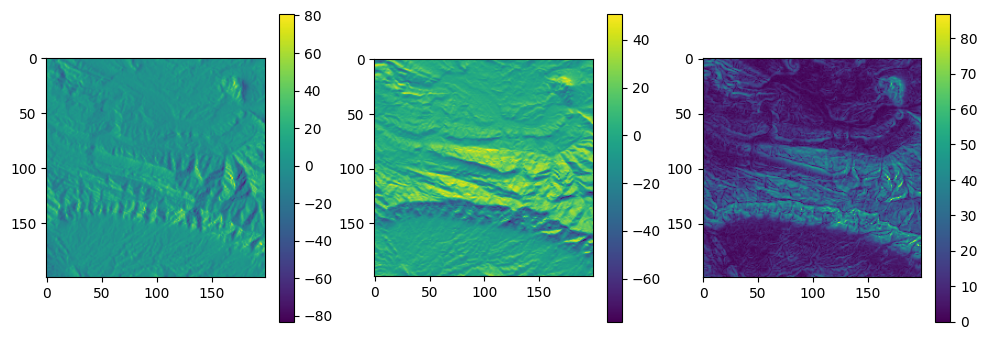

In [93]:
fix, axes = plt.subplots(1, 3, figsize=(12,4))
im1 = axes[0].imshow(grad_x)#, cmap='terrain')
im2 = axes[1].imshow(grad_y)#, cmap='terrain')
im3 = axes[2].imshow(np.sqrt(grad_x[:-1,...]**2 + grad_y[...,:-1]**2).astype(int))
fix.colorbar(im1, ax=axes[0])
fix.colorbar(im2, ax=axes[1])
fix.colorbar(im3, ax=axes[2])

# im1 = sns.heatmap(grad_x, ax=axes[0], annot=True)
# im2 = sns.heatmap(grad_y, ax=axes[1], annot=True)
# im3 = sns.heatmap(sample_data, ax=axes[2], annot=True)



In [94]:


hh = slopes_to_height(grad_x, grad_y)
print(np.unique(hh-sample_data))
print(len(np.unique(hh-sample_data)) == 1)
# fix, axes = plt.subplots(1, 2, figsize=(8,4))
# im1 = sns.heatmap(hh, ax=axes[0], annot=True)
# im2 = sns.heatmap(sample_data2, ax=axes[1], annot=True)

# visualize_terrain(hh)
# visualize_3d_terrain(hh)

[-334.]
True


In [95]:
slopes = np.concatenate([grad_x[:-1, ..., np.newaxis], grad_y[..., :-1, np.newaxis]], axis=2)
slopes.shape

(199, 199, 2)

In [1]:
wfc_terrain = WaveFunctionCollapse(slopes, (2,2,2), (20,20,2), remove_low_freq=False, low_freq=1)


NameError: name 'WaveFunctionCollapse' is not defined

In [97]:
paa = list(wfc_terrain.patterns)
len(paa)

360

In [98]:
vis = WaveFunctionCollapseVisualizer((100,1000), [], wfc_terrain.pattern_to_number, (2,2,2), wfc_terrain.adjacency_rules)

In [101]:
output_image = wfc_terrain.run()


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 132312.43it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 266305.02it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 332881.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 338250.32it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 316551.25it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 401368.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 432402.47it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 407213.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 116346.85it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 350987.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 81920.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 241051.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 541200.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 356962.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 559240.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 574562.19it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 603496.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 590747.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 537731.28it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 105252.30it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 530924.56it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 603496.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 541200.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 172605.10it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 566797.84it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 603496.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 671088.64it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 541200.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 607870.14it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 490561.87it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 327680.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 607870.14it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 298526.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 607870.14it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 626015.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 621378.37it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 645277.54it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 607870.14it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 541200.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 574562.19it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 541200.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 626015.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 574562.19it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 502311.86it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 590747.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 586615.94it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 626015.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 559240.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 551882.11it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 586615.94it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 566797.84it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 551882.11it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 541200.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 586615.94it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 50412.31it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 508400.48it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 607870.14it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 612307.15it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 586615.94it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 559240.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 590747.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 586615.94it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 169466.83it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 541200.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 607870.14it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 574562.19it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 626015.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 349525.33it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 607870.14it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 626015.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 537731.28it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 645277.54it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 603496.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 551882.11it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 645277.54it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 432402.47it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 626015.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 645277.54it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 665762.54it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 645277.54it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 607870.14it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 586615.94it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 484890.64it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 645277.54it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 537731.28it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 612307.15it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 671088.64it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 586615.94it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 496367.34it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 603496.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 537731.28it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 665762.54it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 15025.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 603496.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 544714.81it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 574562.19it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 541200.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 490561.87it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 645277.54it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 626015.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 574562.19it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 590747.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 590747.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 134217.73it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 607870.14it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 541200.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 626015.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 626015.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 626015.52it/s]

No Solution Found, Retrying...



Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 541200.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 174037.51it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 603496.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 432402.47it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 68089.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 603496.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 19920.70it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 331565.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 448588.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 93000.09it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 537731.28it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 559240.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 237637.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 541200.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 607870.14it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 203606.99it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 645277.54it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 150333.48it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 586615.94it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 607870.14it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 448588.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 358487.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 455902.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 232371.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 586615.94it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 607870.14it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 446202.55it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 7530.17it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 334207.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 77172.11it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 259709.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 559240.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 114286.21it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 322638.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 225500.22it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 502311.86it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 490561.87it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 148208.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 502311.86it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 166440.63it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 419430.40it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 473932.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 544714.81it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 250406.21it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 290263.25it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 317750.30it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 345210.21it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 356962.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 401368.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 574562.19it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 121047.73it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 252668.92it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 544714.81it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 289262.34it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 502311.86it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 390167.81it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 343795.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 407213.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 346636.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 541200.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 455902.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 496367.34it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 393831.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 537731.28it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 502311.86it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 134217.73it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 157680.60it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 104206.31it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 436906.67it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 241051.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 502311.86it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 455902.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 280555.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 590747.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 376170.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 502311.86it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 586615.94it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 165782.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 436906.67it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 5736.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 113512.96it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 200205.44it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 541200.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 327680.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 132521.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 61545.18it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 127486.44it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 496367.34it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 502311.86it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 293307.97it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 68702.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 446202.55it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 559240.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 129854.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 96642.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 107546.26it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 40175.33it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 496367.34it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 224294.33it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 206108.30it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 473932.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 190650.18it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 455902.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 299593.14it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 496367.34it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 541200.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 407213.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 302837.83it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 108660.73it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 490561.87it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 586615.94it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 339619.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 607870.14it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 626015.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 612307.15it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 148998.37it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 427990.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 204102.38it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 102550.22it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 530924.56it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 125016.51it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 544714.81it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 544714.81it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 490561.87it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 58661.59it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 153637.51it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 455902.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 47716.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 13306.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 80971.12it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 432402.47it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 436906.67it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 537731.28it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 349525.33it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 401368.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 349525.33it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 496367.34it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 401368.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 266305.02it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 502311.86it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 74038.91it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 33288.13it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 33182.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 455902.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 33554.43it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 31691.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 25450.87it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 253432.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 343795.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 541200.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 502311.86it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 490561.87it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 75166.74it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 551882.11it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 551882.11it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 455902.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 50261.28it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 328965.02it/s]

No Solution Found, Retrying...

Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 559240.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 21301.70it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 502311.86it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 490561.87it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 537731.28it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 419430.40it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 541200.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]

No Solution Found, Retrying...



Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 277768.48it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 586615.94it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 508400.48it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 401368.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 484890.64it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 559240.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 289262.34it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 232371.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 446202.55it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 436906.67it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 559240.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 490561.87it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 537731.28it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 551882.11it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 574562.19it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 586615.94it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 586615.94it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 607870.14it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 607870.14it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 544714.81it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 607870.14it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 586615.94it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 590747.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 566797.84it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 551882.11it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 541200.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 586615.94it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 586615.94it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 586615.94it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 530924.56it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 473932.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 130663.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 541200.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 574562.19it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 126525.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 350987.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 156212.44it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 432402.47it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 508400.48it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 240361.26it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 132312.43it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 197844.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 502311.86it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 124275.67it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 137068.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 55886.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 427990.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 157384.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 139810.13it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 190650.18it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 496367.34it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 484890.64it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 206108.30it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 170847.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 537731.28it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 551882.11it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 590747.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 586615.94it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 508400.48it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 541200.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 574562.19it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 603496.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 559240.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 559240.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 590747.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 113666.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 262965.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 551882.11it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 586615.94it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 496367.34it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 551882.11it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 541200.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 356962.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 45764.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 390167.81it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 167772.16it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 111550.64it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 490561.87it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 122820.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 55998.72it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 262965.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 490561.87it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 586615.94it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 541200.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 586615.94it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 98573.54it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 473932.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 427990.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 473932.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 419430.40it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 496367.34it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 352462.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 544714.81it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 541200.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 551882.11it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 227333.55it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 508400.48it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 473932.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 559240.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 502311.86it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 508400.48it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 249660.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 541200.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 541200.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 551882.11it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 551882.11it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 541200.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 502311.86it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 274137.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 541200.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 502311.86it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 574562.19it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 586615.94it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 586615.94it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 541200.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 544714.81it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 566797.84it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 574562.19it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 544714.81it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 551882.11it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 586615.94it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 537731.28it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 530924.56it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 541200.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 590747.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 574562.19it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 551882.11it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 574562.19it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 151418.92it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 484890.64it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 311844.16it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 496367.34it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 338250.32it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 83635.17it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 502311.86it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 277768.48it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 544714.81it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 537731.28it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 541200.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 551882.11it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 393831.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 427990.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 401368.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 352462.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 343795.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 455902.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 109942.44it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 401368.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 243854.88it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 541200.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 490561.87it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 537731.28it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 313007.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 544714.81it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 227951.30it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 502311.86it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 490561.87it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 210769.05it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 356962.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 393831.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 197844.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 401368.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]

No Solution Found, Retrying...

Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 393831.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 551882.11it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 496367.34it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 502311.86it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 559240.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 551882.11it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 530924.56it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 285326.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 537731.28it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 541200.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 559240.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 530924.56it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 508400.48it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 530924.56it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 541200.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 544714.81it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 290263.25it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 544714.81it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 559240.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 570653.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 559240.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 541200.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 502311.86it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 502311.86it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 551882.11it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 484890.64it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 227333.55it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 537731.28it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 537731.28it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 423667.07it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 551882.11it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 559240.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 541200.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 502311.86it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 82321.96it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 401368.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 118316.05it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 55553.70it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 376170.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 490561.87it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 23730.15it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 322638.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 54225.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]

No Solution Found, Retrying...

Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 307275.02it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 281496.91it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 266305.02it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 327680.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 40741.18it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 166771.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 85163.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 11613.74it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 277768.48it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 427990.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 26732.34it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 190650.18it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 446202.55it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 116832.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 150603.38it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 502311.86it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 254200.24it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 490561.87it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 407213.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 473932.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 508400.48it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 541200.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 555536.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 490561.87it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 343795.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 496367.34it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 484890.64it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 294337.12it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 458393.88it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 35157.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 112447.83it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 349525.33it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 150064.54it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 87655.26it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 20893.17it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 87838.83it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 79287.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 8798.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 16851.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 127292.99it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 118483.16it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 102051.19it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 138197.83it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 19138.96it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 224294.33it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 270600.26it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 401368.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 85860.88it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 327680.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 253432.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 44057.82it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 327680.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 455902.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 113666.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 69212.94it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 31149.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 364722.09it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 244565.83it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 190650.18it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 427990.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 423667.07it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 313007.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 274137.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 350987.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 339619.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 175493.89it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 508400.48it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 455902.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 267153.12it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 177349.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 502311.86it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 281496.91it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 116346.85it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 118483.16it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 502311.86it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 427990.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 484890.64it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 502311.86it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 508400.48it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 89335.55it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 496367.34it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 390167.81it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 502311.86it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 338250.32it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 502311.86it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 490561.87it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 284359.59it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 496367.34it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 397564.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 490561.87it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 496367.34it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 502311.86it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 423667.07it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 215092.51it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 192399.27it/s]

No Solution Found, Retrying...



Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 490561.87it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 217321.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 234975.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 253432.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 473932.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 541200.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 502311.86it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 358487.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 423667.07it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 455902.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 432402.47it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 293307.97it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 20748.47it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 190650.18it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 436906.67it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 502311.86it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 502311.86it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 524288.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 471270.11it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 232371.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 455902.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 490561.87it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 210240.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 345210.21it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 423667.07it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 191958.99it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 490561.87it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 345210.21it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 199728.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 458393.88it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 490561.87it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 302837.83it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 232371.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 508400.48it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 530924.56it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 527585.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 502311.86it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 473932.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 473932.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 502311.86it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 350987.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 496367.34it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 423667.07it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 471270.11it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 427990.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 502311.86it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 155057.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 514638.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 490561.87it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 109226.67it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 170847.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 259709.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 219597.07it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]

No Solution Found, Retrying...



Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 339619.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 238312.73it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 103180.91it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 432402.47it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 490561.87it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 423667.07it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 407213.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 407213.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 455902.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 393831.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 293307.97it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 401368.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 339619.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 85510.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 436906.67it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 178481.02it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 112147.17it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 332881.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 262965.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 44739.24it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 144880.97it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 113666.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 349525.33it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 176602.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 343795.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 124275.67it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 101927.19it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 356962.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 407213.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 111699.17it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 331565.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 126334.46it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 332881.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 235635.06it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 334207.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 446202.55it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]

No Solution Found, Retrying...

Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 352462.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 321402.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 121927.44it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 343795.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 80971.12it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 49257.83it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 334207.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 243854.88it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 168108.38it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 11357.44it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 170847.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 358487.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 401368.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 358487.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 350987.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 39850.87it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 42366.71it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 349525.33it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 407213.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 427990.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 164160.63it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 345210.21it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 210240.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 401368.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 65844.65it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 407213.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 185588.67it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 511500.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 398.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 129854.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 258907.65it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 446202.55it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 436906.67it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 427990.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 4222.81it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 139577.50it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 327680.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 338250.32it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 299593.14it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 407213.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 298526.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 147947.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 12429.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 446202.55it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 338250.32it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 328965.02it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 423667.07it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 266305.02it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 407213.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 339619.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 372827.02it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 210240.80it/s]

No Solution Found, Retrying...



Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 293307.97it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 183558.16it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 217321.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 95760.37it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 352462.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 423667.07it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 397564.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 393831.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 349525.33it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 70197.56it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 432402.47it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 446202.55it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 307275.02it/s]

No Solution Found, Retrying...



Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 423667.07it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 455902.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 137970.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 401368.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 473932.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 502311.86it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 407213.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 432402.47it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 473932.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 484890.64it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 63888.87it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 423667.07it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 294337.12it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 407213.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 156212.44it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 455902.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 270600.26it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 446202.55it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 499321.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 502311.86it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 427990.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 252668.92it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 490561.87it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 484890.64it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 293307.97it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 455902.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 235635.06it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 151692.73it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 393831.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 267153.12it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 427990.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 276851.75it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 322638.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 401368.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 423667.07it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 286300.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 407213.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 302837.83it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 229824.88it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 116832.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 349525.33it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 220173.44it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 317750.30it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 57456.22it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 423667.07it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 117652.29it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 61141.46it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 27173.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 144880.97it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 128266.18it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 302837.83it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 35290.74it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 80659.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 115070.07it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 68928.58it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 328965.02it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 103691.08it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 102051.19it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 419430.40it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 174037.51it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 302837.83it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 238312.73it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 436906.67it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 101434.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 401368.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 274137.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 123543.56it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 490561.87it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 87381.33it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 294337.12it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 29631.25it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 234975.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 455902.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 436906.67it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 93937.38it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 364722.09it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 316551.25it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 270600.26it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 484890.64it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 111699.17it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 259709.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 243148.06it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 180400.17it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 266305.02it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 343795.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 117652.29it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]

No Solution Found, Retrying...

Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 446202.55it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 455902.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 215645.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 339619.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 407213.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 263792.70it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 407213.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 167772.16it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 419430.40it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 221920.85it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 327680.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 427990.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 455902.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 328965.02it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 50141.11it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 54935.22it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 432402.47it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 235635.06it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 473932.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 473932.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 455902.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 471270.11it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 423667.07it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 436906.67it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 427990.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 313007.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 436906.67it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 446202.55it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 455902.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 436906.67it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 455902.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 473932.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 487709.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 273244.56it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 436906.67it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 293307.97it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 455902.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 458393.88it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 247451.56it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 204102.38it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 455902.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 446202.55it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 262965.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 468637.32it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 448588.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 423667.07it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 423667.07it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 169466.83it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 162569.92it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 432402.47it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 432402.47it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 476625.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 401368.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 393831.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 432402.47it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 397564.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 356962.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 266305.02it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 383041.46it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 423667.07it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 427990.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 83635.17it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 393831.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371.81it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 390167.81it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 397564.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 432402.47it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 446202.55it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 299593.14it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 423667.07it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 397564.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 332881.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 423667.07it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 47153.50it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 253432.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 311844.16it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 37803.55it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 446202.55it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 419430.40it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 436906.67it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 407213.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 331565.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 54755.93it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 28737.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 25978.97it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 458393.88it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 446202.55it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 339619.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 24513.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 227333.55it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 25289.74it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 233016.89it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 294337.12it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 22629.10it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 401368.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 274137.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 286300.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 158875.15it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 326404.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 86928.58it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 432402.47it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 82565.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 73262.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 372827.02it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 156212.44it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 308404.71it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 455902.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 99391.09it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 148208.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 194180.74it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 356962.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 172605.10it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 356962.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 358487.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 147947.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 423667.07it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 393831.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 332881.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 407213.98it/s]

No Solution Found, Retrying...



Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 455902.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 436906.67it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 83220.32it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 407213.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 346636.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 455902.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 197844.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 345210.21it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 259709.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 423667.07it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 146910.82it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 158875.15it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 436906.67it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 169466.83it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 249660.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 455902.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 419430.40it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 386571.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 436906.67it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 259709.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 427990.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 345210.21it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 455902.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 423667.07it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 463459.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 241746.63it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 427990.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 254200.24it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 436906.67it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 210769.05it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 249660.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 436906.67it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 401368.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 256532.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 455902.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 432402.47it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 321402.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 230456.26it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 446202.55it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 208154.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 99983.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 446202.55it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 423667.07it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 423667.07it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 427990.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 234975.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 446202.55it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 436906.67it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 188508.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 446202.55it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 364722.09it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 468637.32it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 427990.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 419430.40it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 221920.85it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 436906.67it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 423667.07it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 436906.67it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 405246.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 254200.24it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 458393.88it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 466033.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 436906.67it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 455902.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 255750.24it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 427990.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 423667.07it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 202135.13it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 455902.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 455902.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 407213.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 453438.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 238312.73it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 443841.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 436906.67it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 436906.67it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 376170.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 259709.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 331565.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 224294.33it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 308404.71it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 343795.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 45764.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 122820.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 321402.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 358487.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 34127.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 302837.83it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 206108.30it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 349525.33it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 199728.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 270600.26it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 286300.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 327680.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 313007.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 317750.30it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 62695.13it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 322638.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 302837.83it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 70730.25it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 30716.25it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 74367.09it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 70730.25it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 12385.37it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 147168.56it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 26886.56it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 150603.38it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 56036.13it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 125766.24it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 62322.50it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 307275.02it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 46837.57it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 82321.96it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 62508.26it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 171196.08it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 60047.30it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 53464.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 99508.99it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 40407.55it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 197844.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 125955.08it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 79663.89it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 339619.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 345210.21it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 356962.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 68478.43it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 343795.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 69212.94it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 376170.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 349525.33it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 289262.34it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 13115.40it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 338250.32it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 432402.47it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 338250.32it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 280555.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 38836.15it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 419430.40it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 427990.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 390167.81it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 407213.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 407213.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 355449.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 401368.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 434642.90it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 356962.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 427990.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 358487.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 401368.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 28581.29it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 338250.32it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 307275.02it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 4380.47it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 23147.37it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 37650.84it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 6932.73it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 11709.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 346636.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 376170.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 225500.22it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 19065.02it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 343795.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 270600.26it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 316551.25it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 23308.16it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 301748.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 326404.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 249660.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 270600.26it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 332881.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 277768.48it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 4303.17it/s]

No Solution Found, Retrying...



Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 346636.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 297468.37it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 217321.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 60611.33it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 171897.70it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 298526.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 49607.38it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 18957.31it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 118987.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 30772.59it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 17479.91it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 45664.71it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 10514.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 281496.91it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 289262.34it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 313007.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 64280.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 30023.65it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 88115.63it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 322638.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 97997.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 321402.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 405246.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 64726.91it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 111848.11it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 307275.02it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 427990.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 334207.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 343795.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 126525.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 226719.14it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 401368.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 323884.48it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 343795.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 393831.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 307275.02it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 69155.88it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 397564.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 20550.24it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 390167.81it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 48155.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 356962.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 393831.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 343795.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 317750.30it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 78988.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 393831.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 276851.75it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 352462.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 356962.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 390167.81it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 232371.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 407213.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 40721.40it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 46942.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 78766.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 270600.26it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 339619.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 297468.37it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 278691.30it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 266305.02it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 322638.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 41589.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 79362.42it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 334207.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 407213.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 427990.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 358487.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 423667.07it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 141699.46it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 343795.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 289262.34it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 350987.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 232371.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 301748.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 52232.93it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 259709.23it/s]

No Solution Found, Retrying...



Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 350987.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 40310.47it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 405246.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 141939.22it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 356962.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 289262.34it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 401368.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 121927.44it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 313007.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 328965.02it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 134217.73it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 407213.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 167772.16it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 390167.81it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 436906.67it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 201649.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 282444.71it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 214542.40it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 350987.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 343795.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 356962.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 260515.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 276851.75it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 405246.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 401368.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 356962.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 356962.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 137068.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 350987.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 150064.54it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 407213.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 338250.32it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 322638.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 161009.75it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 222509.50it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 268865.64it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 393831.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 358487.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 286300.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 121750.48it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 243854.88it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 376170.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 334207.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 350987.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 137970.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 405246.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 160087.94it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 313007.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 277768.48it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 338250.32it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 334207.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 299593.14it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 346636.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 217321.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 332881.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 137743.97it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 397564.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 407213.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 427990.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 58497.96it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 345210.21it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 393831.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 350987.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 401368.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 390167.81it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 282444.71it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 350987.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 45565.50it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 51653.99it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 222509.50it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 294337.12it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 202135.13it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 346636.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 303935.07it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 358487.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 390167.81it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 332881.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 419430.40it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 313007.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 26921.08it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 401368.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 25866.81it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 246000.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 32729.64it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 60919.45it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 24008.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 401368.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 23444.96it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 381300.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 327680.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 135082.25it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 390167.81it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 374491.43it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 397564.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 401368.80it/s]

No Solution Found, Retrying...



Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 407213.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 302837.83it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 393831.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 390167.81it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 393831.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 407213.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 208671.84it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 364722.09it/s]

No Solution Found, Retrying...



Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 238312.73it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 397564.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 397564.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 193732.29it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 425817.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 415277.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 407213.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 185178.98it/s]

No Solution Found, Retrying...



Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 328965.02it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 322638.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 327680.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 393831.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 401368.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 419430.40it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 356962.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 334207.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 401368.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 417343.68it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]

No Solution Found, Retrying...



Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 196454.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 407213.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 332881.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 390167.81it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 195995.51it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 322638.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 390167.81it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 289262.34it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 321402.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 50503.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 346636.69it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 343795.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 334207.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 331565.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 327680.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 74898.29it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 356962.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 397564.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 356962.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 188508.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 390167.81it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 407213.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 338250.32it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 356962.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 397564.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 158875.15it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 188508.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 96199.63it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 232371.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 355449.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 339619.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 356962.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 63694.82it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 313007.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 278691.30it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 328965.02it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 140985.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 212908.83it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 358487.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 198312.25it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 326404.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 343795.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 352462.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 376170.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 326404.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 158875.15it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 298526.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 350987.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 343795.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 224294.33it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 237637.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 298526.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 185588.67it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 282444.71it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 289262.34it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 328965.02it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 317750.30it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 291271.11it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 286300.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 297468.37it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 356962.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 393831.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 355449.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 332881.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 313007.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 277768.48it/s]

No Solution Found, Retrying...



Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 62137.84it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 343795.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 102175.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 313007.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 350987.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 334207.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 65844.65it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 302837.83it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 267153.12it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 307275.02it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 356962.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 339619.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 308404.71it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 298526.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 350987.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 252668.92it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 224294.33it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 285326.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 282444.71it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 73843.38it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 343795.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 356962.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 355449.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 322638.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 343795.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 317750.30it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 294337.12it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 286300.61it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 247451.56it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 356962.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 307275.02it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 339619.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 311844.16it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 372827.02it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 345210.21it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 64133.09it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 339619.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 327680.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 383041.46it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 393831.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 334207.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 253432.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 390167.81it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 407213.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 255750.24it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 349525.33it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 393831.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 345210.21it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 376170.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 364722.09it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 183558.16it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 350987.78it/s]

No Solution Found, Retrying...



Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 273244.56it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 267153.12it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 308404.71it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 79063.22it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 194180.74it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 290263.25it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 332881.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 270600.26it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 322638.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 114912.44it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 327680.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 327680.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 358487.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 135957.99it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 322638.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 266305.02it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 237637.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 254200.24it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 358487.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 343795.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 116346.85it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 75709.46it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 28728.11it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 28767.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 163520.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 33743.40it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 262965.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 71150.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 163520.62it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 297468.37it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 63743.22it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 191958.99it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 282444.71it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 294337.12it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 84477.42it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 322638.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 293307.97it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 302837.83it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 123361.88it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 124275.67it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 355449.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 60611.33it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 43873.47it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 134217.73it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 364722.09it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 76329.46it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 339619.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 11210.22it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 358487.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 60047.30it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 295373.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 356962.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 74433.08it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 390167.81it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 327680.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 316551.25it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 212908.83it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 141699.46it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 334207.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 376170.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 313007.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 166440.63it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 317750.30it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 339619.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 92182.51it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 327680.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 224294.33it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 331565.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 204102.38it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 246723.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 390167.81it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 376170.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 241051.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 277768.48it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 263792.70it/s]

No Solution Found, Retrying...



Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 338250.32it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 332881.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 334207.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 376170.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 51845.54it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 328965.02it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 349525.33it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 289262.34it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 334207.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 366314.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 383041.46it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 308404.71it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 169466.83it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 183157.38it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 313007.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 206108.30it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 401368.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 401368.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 317750.30it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 332881.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 356962.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 232371.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 376170.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 349525.33it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 393831.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 393831.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 349525.33it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 274137.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 393831.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 393831.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 401368.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 405246.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 156212.44it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 393831.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 409200.39it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 356962.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 289262.34it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 356962.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 376170.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 356962.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 401368.80it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 376170.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 298526.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 260515.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 243148.06it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 302837.83it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 383041.46it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 140748.46it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 372827.02it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 364722.09it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 256532.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 200205.44it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 372827.02it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 376170.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 235635.06it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 399457.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 302837.83it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 168108.38it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 350987.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 376170.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 364722.09it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 234975.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 317750.30it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 345210.21it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 230456.26it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 383041.46it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 104206.31it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 407213.98it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 249660.95it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 358487.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 364722.09it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 134217.73it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 289262.34it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 349525.33it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 364722.09it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 166440.63it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 339619.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 334207.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 151418.92it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 210769.05it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 383041.46it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 331565.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 391991.03it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 339619.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 316551.25it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 183960.70it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 356962.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 332881.27it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 393831.36it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 289262.34it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 356962.04it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 369542.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 355449.49it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 372827.02it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 363143.20it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 195995.51it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 299593.14it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 339619.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 328965.02it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 93414.34it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 328965.02it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 327680.00it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 238312.73it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 317750.30it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 349525.33it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 338250.32it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 336891.89it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 372827.02it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 322638.77it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 384798.53it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 343795.41it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 311844.16it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 206108.30it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 126525.01it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 371177.35it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 376170.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 208671.84it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 224895.66it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 377865.23it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 291271.11it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 352462.52it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 350987.78it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 313007.76it/s]


No Solution Found, Retrying...


Initializing Grid: 100%|██████████| 20/20 [00:00<00:00, 331565.53it/s]

KeyboardInterrupt



In [ ]:
output_image.shape

(20, 20, 2)

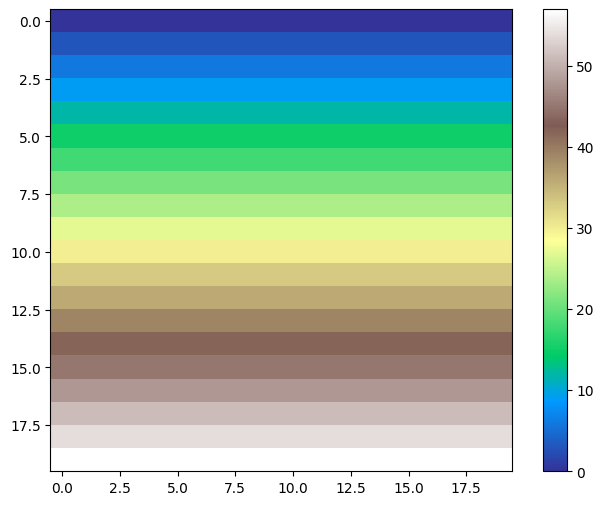

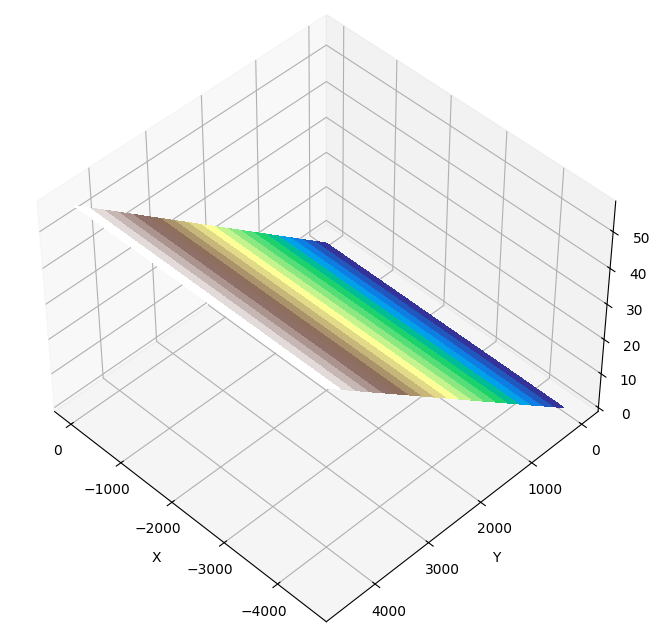

In [ ]:
h_out = slopes_to_height(output_image[..., 0], output_image[..., 1])
visualize_terrain(h_out)
visualize_3d_terrain(h_out, azim=135)

In [ ]:
b = output_image[:2,:2,...]
b.shape

(2, 2, 2)

In [ ]:
b.transpose([1,0,2])[...,0]

array([[ 12.,  12.],
       [-18., -18.]])